# Visualizion for Totten Glacier 

## Objectives
- Use Open Altimetry & Google Earth Engine to look at ICESat-2 tracks across Totten Glacier's grounding line

In [1]:
#%matplotlib inline
%matplotlib widget

#Imports 
import os
import ee
import geemap
import requests
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from datetime import timedelta
import rasterio as rio
from rasterio import plot
from rasterio import warp

In [2]:
#Import to read and store data from the OpenAltimetry API
from utils.oa import dataCollector

In [3]:
#Google Earth Engine Authentication and Initialization
try:
    ee.Initialize()
except: 
    ee.Authenticate()
    ee.Initialize()

In [4]:
# paste the API URL from OpenAltimetry below, and specify the beam you are interested in
oa_api_url = 'http://openaltimetry.org/data/api/icesat2/atl03?date=2019-01-06&minx=115.24465778288615&miny=-67.38169972876892&maxx=116.52445265675665&maxy=-66.88720008618292&trackId=140&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'
gtx = 'gt3l'

In [5]:
is2data = dataCollector(oaurl=oa_api_url,beam=gtx, verbose=True)

OpenAltimetry API URL: http://openaltimetry.org/data/api/icesat2/atlXX?date=2019-01-06&minx=115.24465778288615&miny=-67.38169972876892&maxx=116.52445265675665&maxy=-66.88720008618292&trackId=140&outputFormat=json&beamName=gt3l&client=jupyter
Date: 2019-01-06
Track: 140
Beam: gt3l
Latitude limits: [-67.38169972876892, -66.88720008618292]
Longitude limits: [115.24465778288615, 116.52445265675665]


In [6]:
# latlims = [-68.38916165822235, -65.94328858452876]
# lonlims = [111.85460914515328, 118.0910849556611]
# rgt = 140
# gtx = 'gt2r'
# date = '2019-01-06'
# is2data = dataCollector(date=date, latlims=latlims, lonlims=lonlims, track=rgt, beam=gtx, verbose=True)

In [7]:
#use requestData() to download ATL03, ATL06, ATL08 data based on inputs from dataCollector
is2data.requestData(verbose=True)

---> requesting ATL03 data... Done.
---> requesting ATL06 data... Done.
---> requesting ATL08 data... Done.


In [8]:
#verify stored data
vars(is2data)

{'url': 'http://openaltimetry.org/data/api/icesat2/atlXX?date=2019-01-06&minx=115.24465778288615&miny=-67.38169972876892&maxx=116.52445265675665&maxy=-66.88720008618292&trackId=140&outputFormat=json&beamName=gt3l&client=jupyter',
 'date': '2019-01-06',
 'track': 140,
 'beam': 'gt3l',
 'latlims': [-67.38169972876892, -66.88720008618292],
 'lonlims': [115.24465778288615, 116.52445265675665],
 'atl03':              lat         lon          h   conf
 0     -66.887197  115.892164  128.69180  Noise
 1     -66.887362  115.892098 -128.72430  Noise
 2     -66.887392  115.892090 -115.00964  Noise
 3     -66.887497  115.892074  172.24623  Noise
 4     -66.887578  115.892042   61.26000  Noise
 ...          ...         ...        ...    ...
 51337 -67.381565  115.743879  274.60950   High
 51338 -67.381578  115.743875  274.61298   High
 51339 -67.381597  115.743869  274.84590   High
 51340 -67.381622  115.743862  274.62466   High
 51341 -67.381634  115.743858  274.56190   High
 
 [51342 rows x 4 col

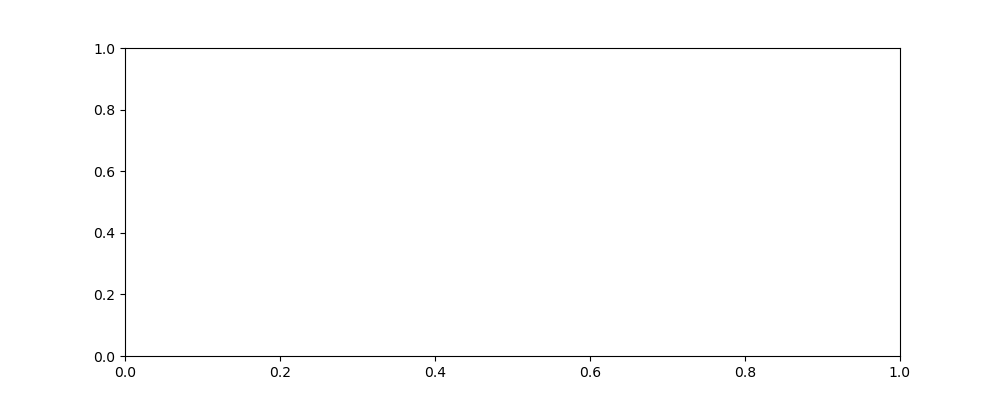

In [9]:
# create the figure and axis
fig, ax = plt.subplots(figsize=[10,4])

In [10]:
#Plot ATL06 elevation vs. latitude
atl06, = ax.plot(is2data.atl06.lat, is2data.atl06.h, label='ATL06')

In [11]:
#add ATL08
atl08, = ax.plot(is2data.atl08.lat, is2data.atl08.h, label='ATL08', linestyle='--')

In [12]:
#For ATL03, we want a scatter plot.
atl03 = ax.scatter(is2data.atl03.lat, is2data.atl03.h, s=1, color='black', label='ATL03')

In [13]:
ax.set_xlabel('latitude')
ax.set_ylabel('elevation in meters')
ax.set_title('ICESat-2 Data across Totten Glacier Grounding Line')

Text(0.5, 1.0, 'ICESat-2 Data across Totten Glacier Grounding Line')

In [14]:
ax.legend(loc='lower right')

In [15]:
# add some text to provide info on what is plotted
info = 'ICESat-2 track {track:d}-{beam:s} on {date:s}\n({lon:.4f}E, {lat:.4f}N)'.format(track=is2data.track, 
                                                                                        beam=is2data.beam, 
                                                                                        date=is2data.date, 
                                                                                        lon=np.mean(is2data.lonlims), 
                                                                                        lat=np.mean(is2data.latlims))
infotext = ax.text(0.01, 0.03, info,
                   horizontalalignment='left', 
                   verticalalignment='bottom', 
                   transform=ax.transAxes,
                   bbox=dict(edgecolor=None, facecolor='white', alpha=0.9, linewidth=0))

In [16]:
fig.tight_layout()

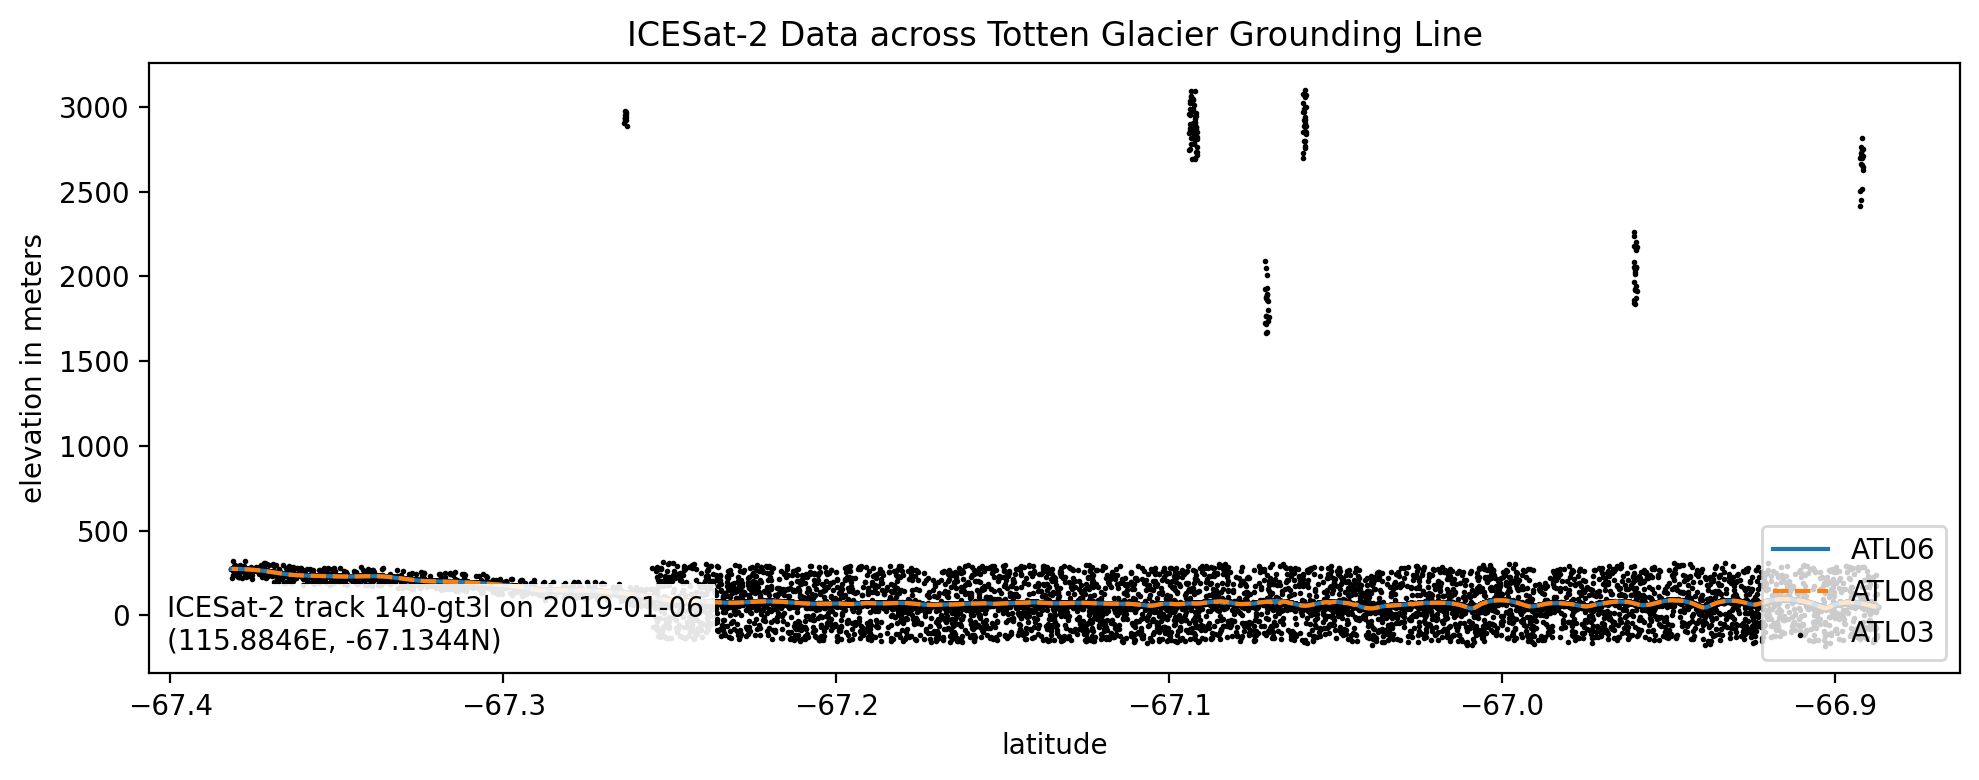

In [17]:
fig

In [18]:
fig.savefig('Totten_Grounding.jpg')

In [19]:
fig.savefig('Totten_Grounding_better-resolution.jpg',dpi=300)

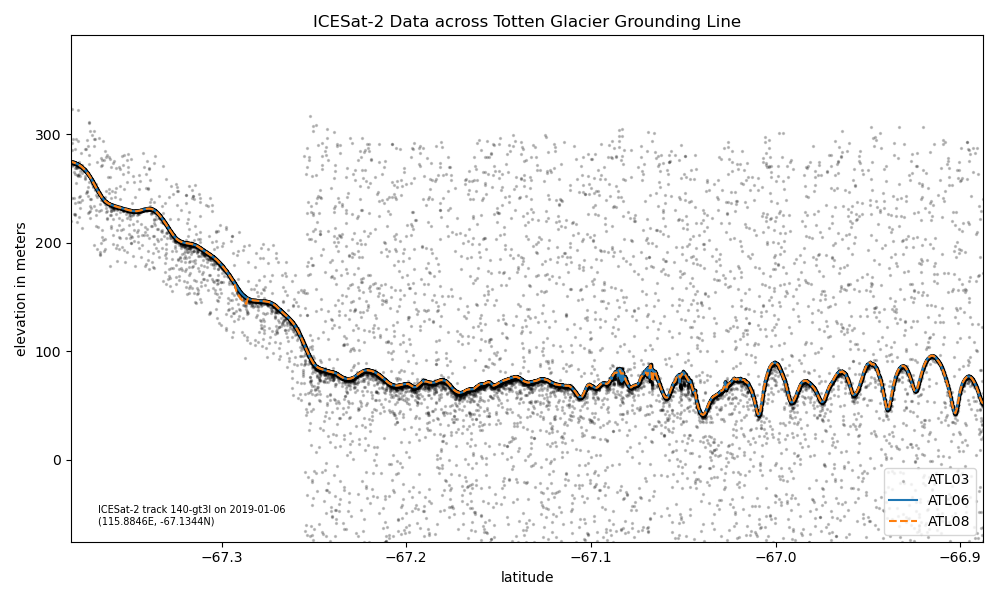

In [20]:
fig = is2data.plotData()

In [21]:
def plot_from_oa_url(url,gtx,title='ICESat-2 Data'):
    mydata = dataCollector(oaurl=url,beam=gtx)
    mydata.requestData()
    myplot = mydata.plotData(title=title)
    return (myplot, mydata)

In [22]:
is2data.plotData?

Signature:
is2data.plotData(
    ax=None,
    title='ICESat-2 Data across Totten Glacier Grounding Line',
)
Docstring: <no docstring>
File:      ~/ice-discharge/contributors/jandreasen/utils/oa.py
Type:      method


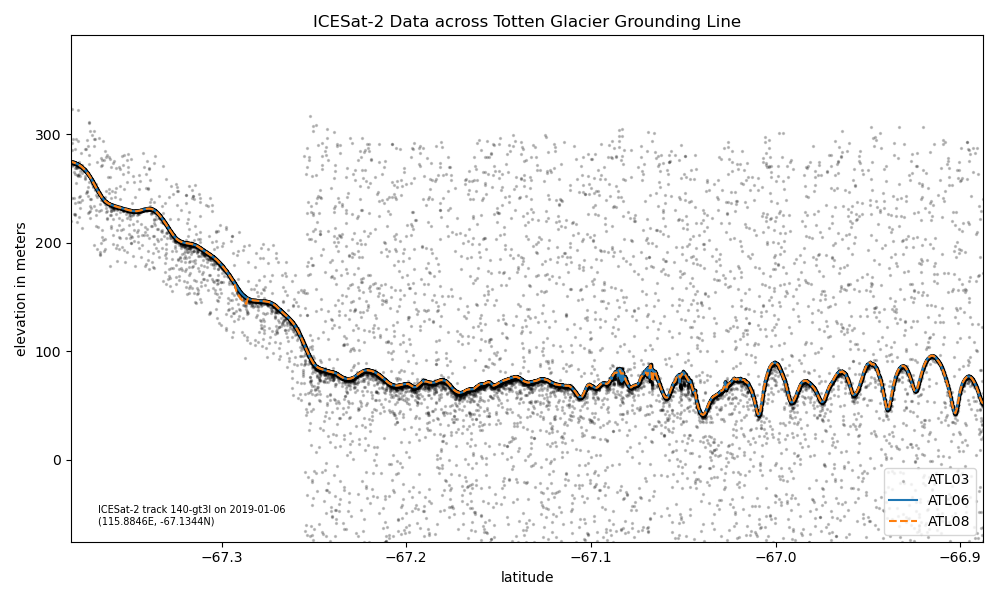

In [24]:
url = 'http://openaltimetry.org/data/api/icesat2/atl03?date=2019-01-06&minx=115.24465778288615&miny=-67.38169972876892&maxx=116.52445265675665&maxy=-66.88720008618292&trackId=140&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'
gtx = 'gt3l'
myplot, mydata = plot_from_oa_url(url=url, gtx=gtx, title='ICESat-2 Data across Totten Glacier Grounding Line')
myplot.savefig('Totten_Grounding1.jpg', dpi=300)

In [25]:
def dist_latlon2meters(lat1, lon1, lat2, lon2):
    # returns the distance between two coordinate points - (lon1, lat1) and (lon2, lat2) along the earth's surface in meters.
    R = 6371000
    def deg2rad(deg):
        return deg * (np.pi/180)
    dlat = deg2rad(lat2-lat1)
    dlon = deg2rad(lon2-lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(deg2rad(lat1)) * np.cos(deg2rad(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

lat1, lat2 = mydata.atl08.lat[0], mydata.atl08.lat.iloc[-1]
lon1, lon2 = mydata.atl08.lon[0], mydata.atl08.lon.iloc[-1]

ground_track_length = dist_latlon2meters(lat1, lon1, lat2, lon2)
print('The ground track is about %.1f kilometers long.' % (ground_track_length/1e3))

The ground track is about 55.3 kilometers long.


In [26]:
Map = geemap.Map()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [27]:
ground_track_coordinates = list(zip(mydata.atl08.lon, mydata.atl08.lat))
ground_track_projection = 'EPSG:4326' # <-- this specifies that our data longitude/latitude in degrees [https://epsg.io/4326]
gtx_feature = ee.FeatureCollection(ee.Geometry.LineString(coords=ground_track_coordinates, 
                                      proj=ground_track_projection, 
                                      geodesic=True))
gtx_feature

In [28]:
Map.addLayer(gtx_feature, {'color': 'red'}, 'ground track')

In [29]:
center_lon = (lon1 + lon2) / 2
center_lat = (lat1 + lat2) / 2
Map.setCenter(center_lon, center_lat, zoom=2);

In [30]:
Map.add_basemap('SATELLITE') # <-- this adds a layer called 'Google Satellite'
Map.layer_opacity(name='Google Satellite', value=0.5)
Map.setCenter(center_lon, center_lat, zoom=7);

In [31]:
Map.addLayer(gtx_feature,{'color': 'red'},'ground track')

In [32]:
collection_name1 = 'LANDSAT/LC08/C01/T2'  # Landsat 8 earth engine collection 
# https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T2

In [33]:
collection = ee.ImageCollection(collection_name1)
collection

In [34]:
number_of_scenes = collection.size()
number_of_scenes

In [35]:
number_of_scenes = collection.size().getInfo()
number_of_scenes

897557

In [36]:
# the point of interest (center of the track) as an Earth Engine Geometry
point_of_interest = ee.Geometry.Point(center_lon, center_lat)

In [37]:
collection = collection.filterBounds(point_of_interest)

In [38]:
print('There are {number:d} images in the spatially filtered collection.'.format(number=collection.size().getInfo()))

There are 389 images in the spatially filtered collection.


In [39]:
days_buffer_imagery = 60

In [40]:
dateformat = '%Y-%m-%d'
datetime_requested = datetime.strptime(mydata.date, dateformat)
search_start = (datetime_requested - timedelta(days=days_buffer_imagery)).strftime(dateformat)
search_end = (datetime_requested + timedelta(days=days_buffer_imagery)).strftime(dateformat)
print('Search for imagery from {start:s} to {end:s}.'.format(start=search_start, end=search_end))

Search for imagery from 2018-11-07 to 2019-03-07.


In [41]:
collection = collection.filterDate(search_start, search_end)

In [42]:
print('There are {number:d} images in the spatially filtered collection.'.format(number=collection.size().getInfo()))

There are 46 images in the spatially filtered collection.


In [43]:
collection = collection.sort('system:time_start') 
info = collection.getInfo()
type(info)
info.keys()
type(info['features'])
len(info['features'])

46

In [82]:
feature_number = 15
info['features'][0].keys()

dict_keys(['type', 'bands', 'id', 'version', 'properties'])

In [83]:
info['features'][feature_number]['id']

'LANDSAT/LC08/C01/T2/LC08_102107_20181217'

In [84]:
for band in info['features'][feature_number]['bands']:
    print(band['id'], end=', ')

B1, B2, B3, B4, B5, B6, B7, B8, B9, B10, B11, BQA, 

In [85]:
for feature in info['features']:
    print(feature['properties']['LANDSAT_PRODUCT_ID'])

LC08_L1GT_101107_20181108_20181116_01_T2
LC08_L1GT_010137_20181110_20181127_01_T2
LC08_L1GT_008137_20181112_20181127_01_T2
LC08_L1GT_102107_20181115_20181128_01_T2
LC08_L1GT_100107_20181117_20181129_01_T2
LC08_L1GT_009137_20181119_20181129_01_T2
LC08_L1GT_101107_20181124_20181210_01_T2
LC08_L1GT_010137_20181126_20181210_01_T2
LC08_L1GT_008137_20181128_20181211_01_T2
LC08_L1GT_102107_20181201_20181211_01_T2
LC08_L1GT_100107_20181203_20181211_01_T2
LC08_L1GT_009137_20181205_20181211_01_T2
LC08_L1GT_101107_20181210_20181226_01_T2
LC08_L1GT_010137_20181212_20181226_01_T2
LC08_L1GT_008137_20181214_20181227_01_T2
LC08_L1GT_102107_20181217_20181227_01_T2
LC08_L1GT_100107_20181219_20181227_01_T2
LC08_L1GT_009137_20181221_20181227_01_T2
LC08_L1GT_101107_20181226_20190129_01_T2
LC08_L1GT_010137_20181228_20190129_01_T2
LC08_L1GT_008137_20181230_20190130_01_T2
LC08_L1GT_102107_20190102_20190130_01_T2
LC08_L1GT_100107_20190104_20190130_01_T2
LC08_L1GT_009137_20190106_20190130_01_T2
LC08_L1GT_101107

In [86]:
this_id = info['features'][feature_number]['id']
print(this_id)
myImage = ee.Image(this_id)
myImage

LANDSAT/LC08/C01/T2/LC08_102107_20181217


In [87]:
feature_number = 15
myImage = ee.Image(info['features'][feature_number]['id'])
myImage_RGB = myImage.select('B4', 'B3', 'B2')
Map.addLayer(myImage_RGB, name='my other image')
Map.addLayer(gtx_feature,{'color': 'red'},'ground track')

In [88]:
myImage_RGB = myImage.select('B4','B3','B2')
Map.addLayer(myImage_RGB, name='my image')

In [89]:
Map = geemap.Map()
Map.add_basemap('SATELLITE')

for i, feature in enumerate(info['features']):
    image_id = feature['id']
    reference = '%02d: %s' % (i, image_id)
    print(reference)
    myImage_RGB = ee.Image(image_id).select('B4', 'B3', 'B2')
    Map.addLayer(myImage_RGB, name=reference, shown=False)

Map.addLayer(gtx_feature,{'color': 'red'},'ground track')
Map.centerObject(gtx_feature, zoom=10)
Map

00: LANDSAT/LC08/C01/T2/LC08_101107_20181108
01: LANDSAT/LC08/C01/T2/LC08_010137_20181110
02: LANDSAT/LC08/C01/T2/LC08_008137_20181112
03: LANDSAT/LC08/C01/T2/LC08_102107_20181115
04: LANDSAT/LC08/C01/T2/LC08_100107_20181117
05: LANDSAT/LC08/C01/T2/LC08_009137_20181119
06: LANDSAT/LC08/C01/T2/LC08_101107_20181124
07: LANDSAT/LC08/C01/T2/LC08_010137_20181126
08: LANDSAT/LC08/C01/T2/LC08_008137_20181128
09: LANDSAT/LC08/C01/T2/LC08_102107_20181201
10: LANDSAT/LC08/C01/T2/LC08_100107_20181203
11: LANDSAT/LC08/C01/T2/LC08_009137_20181205
12: LANDSAT/LC08/C01/T2/LC08_101107_20181210
13: LANDSAT/LC08/C01/T2/LC08_010137_20181212
14: LANDSAT/LC08/C01/T2/LC08_008137_20181214
15: LANDSAT/LC08/C01/T2/LC08_102107_20181217
16: LANDSAT/LC08/C01/T2/LC08_100107_20181219
17: LANDSAT/LC08/C01/T2/LC08_009137_20181221
18: LANDSAT/LC08/C01/T2/LC08_101107_20181226
19: LANDSAT/LC08/C01/T2/LC08_010137_20181228
20: LANDSAT/LC08/C01/T2/LC08_008137_20181230
21: LANDSAT/LC08/C01/T2/LC08_102107_20190102
22: LANDSA

Map(center=[-67.13458146925946, 115.81857034603136], controls=(WidgetControl(options=['position', 'transparent…

In [91]:
selected_image_id = 'LANDSAT/LC08/C01/T2/LC08_102107_20181217'
rgb = ee.Image(selected_image_id).select('B4', 'B3', 'B2')

buffer_around_center_meters = ground_track_length*0.7
download_region = point_of_interest.buffer(buffer_around_center_meters)
rgbmax = rgb.reduce(ee.Reducer.max()).reduceRegion(reducer=ee.Reducer.max(), geometry=download_region, bestEffort=True, maxPixels=1e6)
rgbmin = rgb.reduce(ee.Reducer.min()).reduceRegion(reducer=ee.Reducer.min(), geometry=download_region, bestEffort=True, maxPixels=1e6)
rgb = rgb.unitScale(ee.Number(rgbmin.get('min')), ee.Number(rgbmax.get('max'))).clamp(0.0, 1.0).multiply(255).uint8()

rgb_info = rgb.getInfo()
downloadURL = rgb.getDownloadUrl({'name': 'mySatelliteImage',
                                  'crs': 'EPSG:3031',
                                  'scale': rgb_info['bands'][0]['crs_transform'][0],
                                  'region': download_region,
                                  'filePerBand': False,
                                  'format': 'GEO_TIFF'})

downloadURL

'https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/7de67a91078fbc88ce0adc4b952f20c3-559a81d84c7b1836b623aa1ce8d31c2c:getPixels'

In [92]:
response = requests.get(downloadURL)
filename = 'Totten_Grounding2.tif'
with open(filename, 'wb') as f:
    f.write(response.content)

In [93]:
myImage = rio.open(filename)
myImage

<open DatasetReader name='Totten_Grounding2.tif' mode='r'>

<AxesSubplot:>

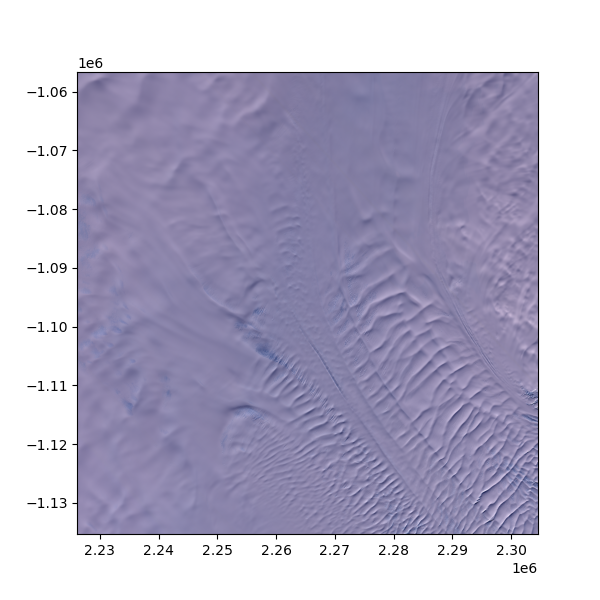

In [94]:
fig, ax = plt.subplots(figsize=[6,6])
plot.show(myImage, ax=ax)

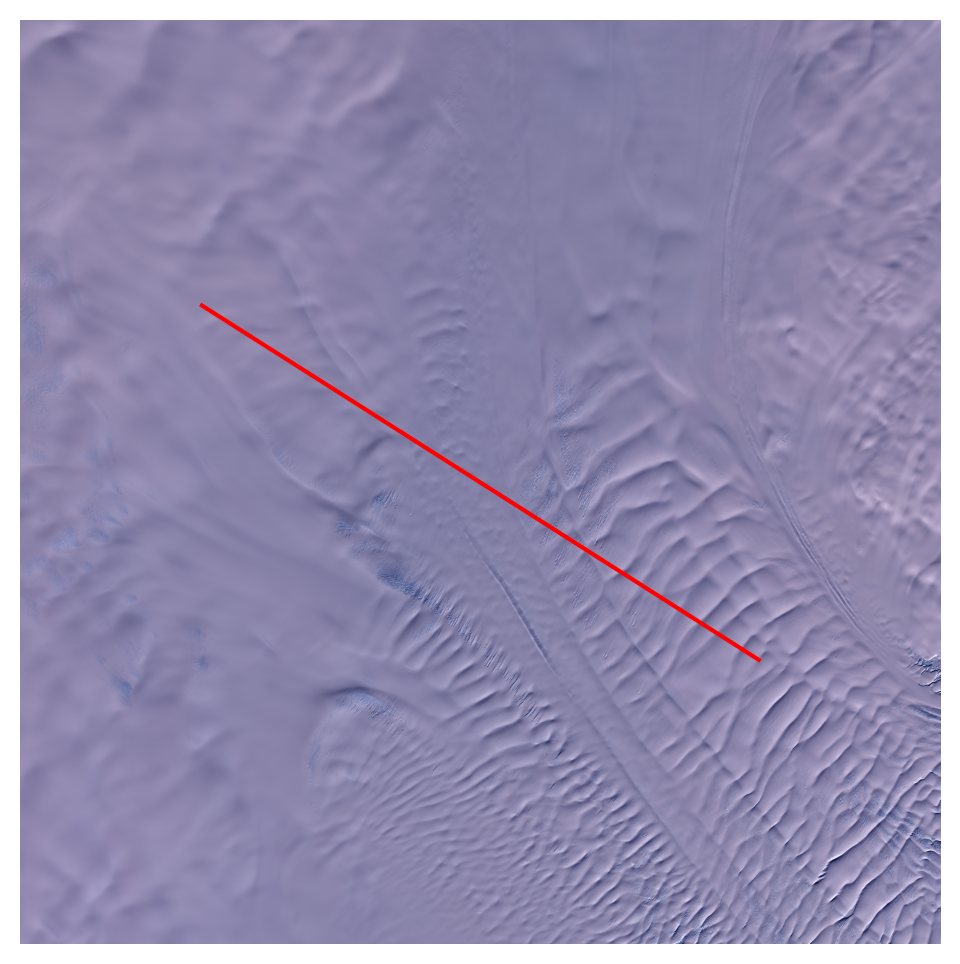

In [95]:
gtx_x, gtx_y = warp.transform(src_crs='epsg:4326', dst_crs=myImage.crs, xs=mydata.atl08.lon, ys=mydata.atl08.lat)
ax.plot(gtx_x, gtx_y, color='red', linestyle='-')
ax.axis('off')
fig

In [96]:
mydata.makeGEEmap()

The ground track is 55300 meters long.
Search for imagery from 2018-12-12 to 2019-01-31.
--> Number of scenes found within +/- 25 days of ICESat-2 overpass: 27
----> This is too many. Narrowing it down...
Search for imagery from 2018-12-23 to 2019-01-20.
--> Number of scenes found within +/- 14 days of ICESat-2 overpass: 14
00: 2018-12-26 ( 11 days before ICESat-2 overpass): LANDSAT/LC08/C01/T2/LC08_101107_20181226
01: 2018-12-28 (  9 days before ICESat-2 overpass): LANDSAT/LC08/C01/T2/LC08_010137_20181228
02: 2018-12-30 (  7 days before ICESat-2 overpass): LANDSAT/LC08/C01/T2/LC08_008137_20181230
03: 2019-01-01 (  5 days before ICESat-2 overpass): COPERNICUS/S2_SR/20190101T012539_20190101T012539_T50DML
04: 2019-01-01 (  5 days before ICESat-2 overpass): COPERNICUS/S2_SR/20190101T012539_20190101T012539_T49DFF
05: 2019-01-02 (  4 days before ICESat-2 overpass): LANDSAT/LC08/C01/T2/LC08_102107_20190102
06: 2019-01-04 (  2 days before ICESat-2 overpass): LANDSAT/LC08/C01/T2/LC08_100107_20

Map(center=[-67.13454271003667, 115.81796467086518], controls=(WidgetControl(options=['position', 'transparent…

Downloaded downloads/LANDSAT-LC08-C01-T2-LC08_102107_20181217-8bitRGB.tif
Saved plot to: plots/LANDSAT-LC08-C01-T2-LC08_102107_20181217-8bitRGB-plot.jpg


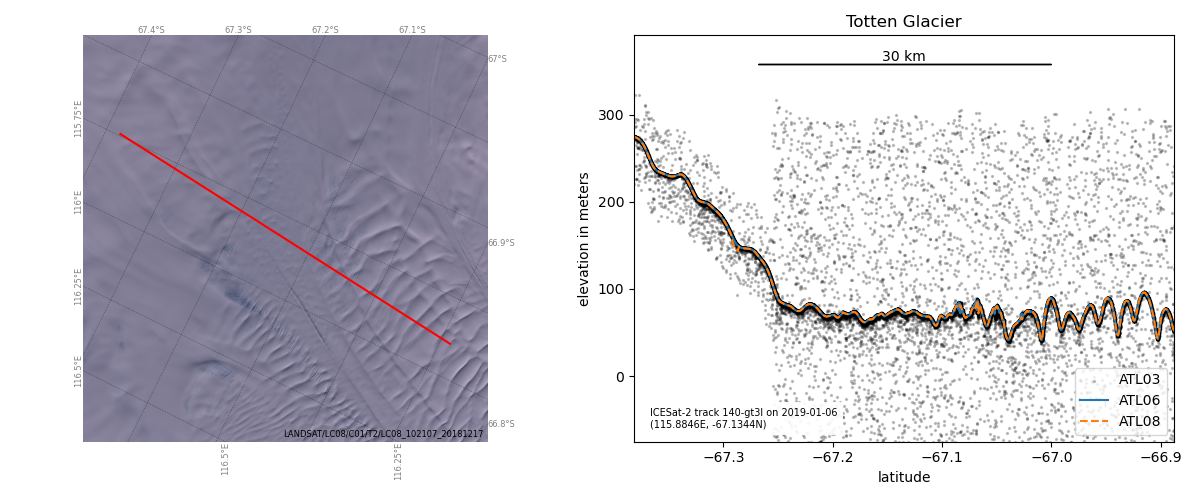

In [98]:
myProductId = 'LANDSAT/LC08/C01/T2/LC08_102107_20181217' # <-- copy-pasted from above, after looking at the layers in the map
figure = mydata.plotDataAndMap(myProductId, crs='EPSG:3031', title='Totten Glacier')